# Phishing URL (website)

Phishing é uma atividade fraudulenta usada com o intuito de obter um ganho financeiro de forma ilícita.

De acordo com o observado por Chanti [(2022)](https://https://www.researchgate.net/profile/Chanti-Surya-Prakasam/publication/360335545_A_literature_review_on_classification_of_phishing_attacks/links/627103952f9ccf58eb289337/A-literature-review-on-classification-of-phishing-attacks.pdf), o phishing tem por intenção o roubo de credenciais ou o controle das informações do usuário, podendo ser subdivido conforme em:



1.   **Roubo de credenciais:** coleta de informações como username, password, senhas, cartão de crédito e etc.

  1.1 **Engenharia Social:** envolve o uso de comunicações que fazem uma manipulação psicológica para levar a vítima a executar determinadas ações.

  1.2 **Malware:** envolve a instalação de um software malicioso no computador/celular da vítima, que é baixado via e-mail, downloads em sites entre outros.

2.   **Controle de informações do usuário:** utiliza um malware para fazer o bloqueio da tela de login e ou criptografar arquivos/disco rigído.

  2.1 **Ransomware:** é um tipo de malware, ou seja, um software utilizado para bloquear o usuário de acessar a sua máquina.
  * **Bloqueio do PC/ Tela:** envolve o bloqueio da tela, onde um alerta ou algo similar é mostrado para a vítima.
  * **Criptografia:** envolve a criptografia de arquivos/PC e a vítima, onde a vítima precisa pagar para ter os seus arquivos descriptografados.

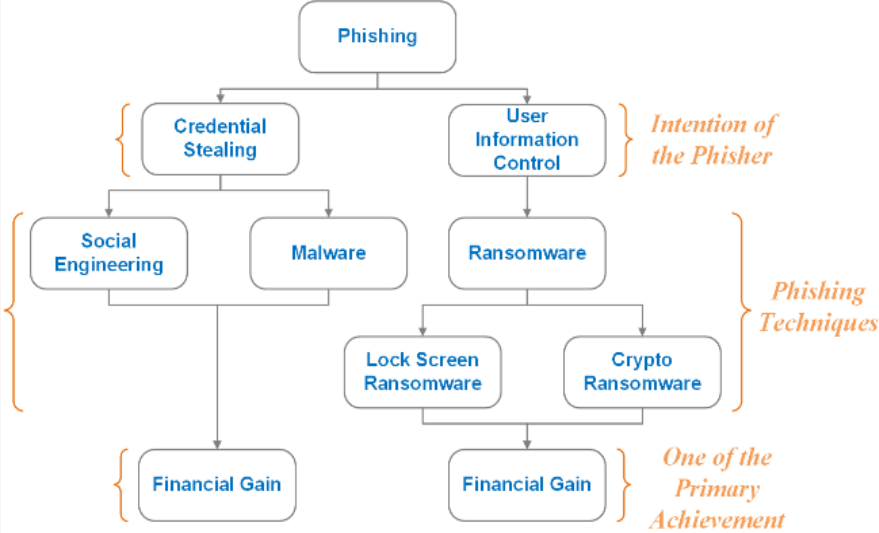

Figura 1: Categorização dos ataques de phishing segundo Chanti (2022).

## Bibliotecas

In [87]:
!pip install ucimlrepo


In [88]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

## PhiUSIIL - base de dados

---

O dataset escolhido para o MVP foi o PhiUSIIL, que contém aproximadamente 236k URLs com sites legítimos e sites de phishing. Esses dados foram usados no artigo de Prasad ([2024](https://https://www.sciencedirect.com/science/article/abs/pii/S0167404823004558?via%3Dihub)) para obter um indice de similaridade que pode ser usado na identificação de URLs inseguras. O objetivo deste projeto será realizar a exploração desses dados com o intuito de trazer informações sobre características de phishing URLs que possam ser observavéis pela população. Ou seja, ao final desse projeto vamos setar recomendações para que as pessoas se previnam desses golpes.


In [89]:
# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print(phiusiil_phishing_url_website.metadata)


{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

In [90]:
# variable information
print(phiusiil_phishing_url_website.variables)

                          name     role         type demographic description  \
0                     FILENAME    Other  Categorical        None        None   
1                          URL  Feature  Categorical        None        None   
2                    URLLength  Feature      Integer        None        None   
3                       Domain  Feature  Categorical        None        None   
4                 DomainLength  Feature      Integer        None        None   
5                   IsDomainIP  Feature      Integer        None        None   
6                          TLD  Feature  Categorical        None        None   
7           URLSimilarityIndex  Feature      Integer        None        None   
8         CharContinuationRate  Feature      Integer        None        None   
9            TLDLegitimateProb  Feature   Continuous        None        None   
10                 URLCharProb  Feature   Continuous        None        None   
11                   TLDLength  Feature 

No comando acima verificamos quais são os atributos do dataset. No artigo de Prasad (2024) há algumas a descrição de alguns campos do dataset, que foram traduzidos na tabela abaixo:




In [91]:
# Criando os dados da tabela
data = {
    "Nome": [
        "URL", "URLLength", "Domain", "DomainLength", "IsDomainIP",
        "TLD", "URLSimilarityIndex", "CharContinuationRate",
        "TLDLegitimateProb", "URLCharProb", "TLDLength",
        "NoOfSubDomain", "HasObfuscation", "NoOfObfuscatedChar",
        "ObfuscationRatio", "NoOfLettersInURL", "LetterRatioInURL",
        "NoOfDigitsInURL", "DigitRatioInURL", "NoOfEqualsInURL",
        "NoOfQMarkInURL", "NoOfAmpersandInURL", "NoOfOtherSpecialCharsInURL",
        "SpacialCharRatioInURL", "IsHTTPS", "LineOfCode",
        "LargestLineLength", "HasTitle", "Title", "DomainTitleMatchScore",
        "URLTitleMatchScore", "HasFavicon", "Robots", "IsResponsive",
        "NoOfURLRedirect", "NoOfSelfRedirect", "HasDescription",
        "NoOfPopup", "NoOfiFrame", "HasExternalFormSubmit",
        "HasSocialNet", "HasSubmitButton", "HasHiddenFields",
        "HasPasswordField", "Bank", "Pay", "Crypto",
        "HasCopyrightInfo", "NoOfImage", "NoOfCSS", "NoOfJS",
        "NoOfSelfRef", "NoOfEmptyRef", "NoOfExternalRef", "label"
    ],
    "Tipo": [
        "Categórico", "Inteiro", "Categórico", "Inteiro", "Inteiro",
        "Categórico", "Inteiro", "Inteiro", "Contínuo", "Contínuo",
        "Inteiro", "Inteiro", "Inteiro", "Inteiro", "Inteiro",
        "Inteiro", "Contínuo", "Inteiro", "Inteiro", "Inteiro",
        "Inteiro", "Inteiro", "Inteiro", "Inteiro", "Contínuo",
        "Inteiro", "Inteiro", "Inteiro", "Categórico", "Inteiro",
        "Inteiro", "Inteiro", "Inteiro", "Inteiro", "Inteiro",
        "Inteiro", "Inteiro", "Inteiro", "Inteiro", "Inteiro",
        "Inteiro", "Inteiro", "Inteiro", "Inteiro", "Inteiro",
        "Inteiro", "Inteiro", "Inteiro", "Inteiro", "Inteiro",
        "Inteiro", "Inteiro", "Inteiro", "Inteiro", "Inteiro",
        "Inteiro", "Inteiro", "Inteiro"
    ],
    "Descrição": [
        "Endereço do website",
        "URLs de phishing são frequentemente mais longas do que URLs legítimas.",
        "Nome do domínio do website",
        "Tamanho do domínio do website",
        "URL usa endereço de IP ao invés de um nome de domínio?",
        "TLD (Top Level Domain) é a última parte do nome do domínio.",
        "Index calculado pelo algoritmo do artigo de (Prasad, 2024)",
        "O CharContinuationRate indica sequências de letras e dígitos.",
        "O domínio de nível superior indica o propósito de uma URL.",
        "Contagem de letras e dígitos em URLs legítimas e de phishing.",
        "Tamanho do TLD",
        "Contagem de subdomínios.",
        "Há ofuscação na URL?",
        "Contagem de caracteres ofuscados na URL.",
        "Divisão da contagem de caracteres ofuscados pela URL.",
        "Contagem de letras da URL.",
        "Divisão da contagem de letras pela URL.",
        "Contagem de dígitos na URL.",
        "Divisão do número de dígitos pela URL.",
        "Contagem de símbolos como '=', '?', ou '%'.",
        "Não encontrado",
        "Não encontrado",
        "Contagem de caracteres especiais na URL.",
        "Não encontrado",
        "Indica se a página está rodando em HTTP ou HTTPS.",
        "Não encontrado",
        "Cibercriminosos podem usar texto criptografado.",
        "A maioria dos sites legítimos possui títulos.",
        "Título do website",
        "Não encontrado",
        "Cibercriminosos usam táticas de engenharia social.",
        "A maioria dos sites legítimos tem logotipo na tag favicon.",
        "Não encontrado",
        "Sites legítimos são responsivos.",
        "Número de redirecionamentos em URLs.",
        "Número de auto redirecionamentos.",
        "Sites legítimos fornecem descrições.",
        "Número de pop-ups no site.",
        "Número de iframes no site.",
        "Sites de phishing frequentemente usam formulários HTML.",
        "Informações de copyright e redes sociais são comuns.",
        "Botão para submissão de dados para URLs externas",
        "Há campos escondidos no site",
        "Há presença de campos para inserção de senha",
        "Há elementos como banco?",
        "Há elementos de pagamentos",
        "Há elementos de criptomoedas",
        "Há informações de copyright",
        "Número de imagens no site.",
        "Não encontrado",
        "JavaScript é usado para criar páginas interativas.",
        "Número de hipervínculos que direcionam para si mesmos.",
        "Número de hipervínculos vazios.",
        "Número de hipervínculos externos.",
        "Indica se o site é legítimo ou phishing."
    ]
}

# Ajustando o tamanho dos arrays para garantir que todos tenham 78 elementos
for key in data.keys():
    while len(data[key]) < 78:
        data[key].append("Não encontrado")

# Criando o DataFrame
df = pd.DataFrame(data)

# Exibindo o DataFrame
df.head(55)  # Mostra as primeiras linhas da tabela

,Nome,Tipo,Descrição
0,URL,Categórico,Endereço do website
1,URLLength,Inteiro,URLs de phishing são frequentemente mais longa...
2,Domain,Categórico,Nome do domínio do website
3,DomainLength,Inteiro,Tamanho do domínio do website
4,IsDomainIP,Inteiro,URL usa endereço de IP ao invés de um nome de ...
5,TLD,Categórico,TLD (Top Level Domain) é a última parte do nom...
6,URLSimilarityIndex,Inteiro,Index calculado pelo algoritmo do artigo de (P...
7,CharContinuationRate,Inteiro,O CharContinuationRate indica sequências de le...
8,TLDLegitimateProb,Contínuo,O domínio de nível superior indica o propósito...
9,URLCharProb,Contínuo,Contagem de letras e dígitos em URLs legítimas...


As colunas em que não encontrei a descrição do campo no artigo, vou eliminar do meu dataset [X].

In [92]:
descricao_nao_encontrada0 = df[df['Descrição'] == 'Não encontrado']['Nome'].tolist()
descricao_nao_encontrada = [x for x in descricao_nao_encontrada0 if x != 'Não encontrado']

descricao_nao_encontrada

['NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'SpacialCharRatioInURL',
 'LineOfCode',
 'DomainTitleMatchScore',
 'Robots',
 'NoOfCSS']

Vou remover da análise algumas colunas que não vão servir para a sequência da minha análise de dados.

In [93]:
remover = ['URL','Domain', 'URLSimilarityIndex', 'CharContinuationRate', 'URLCharProb', 'LargestLineLength', 'Title',
'URLTitleMatchScore', 'NoOfJS']

remover.extend(descricao_nao_encontrada)

remover


['URL',
 'Domain',
 'URLSimilarityIndex',
 'CharContinuationRate',
 'URLCharProb',
 'LargestLineLength',
 'Title',
 'URLTitleMatchScore',
 'NoOfJS',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'SpacialCharRatioInURL',
 'LineOfCode',
 'DomainTitleMatchScore',
 'Robots',
 'NoOfCSS']

In [94]:
# Novo dataset com as colunas removidas
X = X.drop(columns=remover)

print(X.columns)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'TLDLegitimateProb',
       'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'HasTitle', 'HasFavicon',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')


In [95]:
# concatenando o dataframe (x) com o target (y) para fazer algumas visualizações.
dataframe = pd.DataFrame(X)
dataframe['target'] = y


dataframe

,URLLength,DomainLength,IsDomainIP,TLD,TLDLegitimateProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfOtherSpecialCharsInURL,IsHTTPS,HasTitle,HasFavicon,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,target
0,31,24,0,com,0.522907,3,1,0,0,0.0,18,0.581,0,0.000,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,119,0,124,1
1,23,16,0,de,0.032650,2,1,0,0,0.0,9,0.391,0,0.000,0,2,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,39,0,217,1
2,29,22,0,uk,0.028555,2,2,0,0,0.0,15,0.517,0,0.000,0,2,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,42,2,5,1
3,26,19,0,com,0.522907,3,1,0,0,0.0,13,0.500,0,0.000,0,1,1,1,0,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,22,1,31,1
4,33,26,0,org,0.079963,3,1,0,0,0.0,20,0.606,0,0.000,0,1,1,1,0,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,com,0.522907,3,1,0,0,0.0,16,0.552,0,0.000,0,1,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,187,2,191,1
235791,28,21,0,uk,0.028555,2,2,0,0,0.0,14,0.500,0,0.000,0,2,1,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,88,0,31,1
235792,30,23,0,be,0.003319,2,1,0,0,0.0,17,0.567,0,0.000,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,58,2,67,1
235793,55,47,0,dev,0.000961,3,2,0,0,0.0,39,0.709,3,0.055,0,5,1,1,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [96]:
# check das informações do dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  object 
 4   TLDLegitimateProb           235795 non-null  float64
 5   TLDLength                   235795 non-null  int64  
 6   NoOfSubDomain               235795 non-null  int64  
 7   HasObfuscation              235795 non-null  int64  
 8   NoOfObfuscatedChar          235795 non-null  int64  
 9   ObfuscationRatio            235795 non-null  float64
 10  NoOfLettersInURL            235795 non-null  int64  
 11  LetterRatioInURL            235795 non-null  float64
 12  NoOfDegitsInURL             235795 non-null  int64  
 13  DegitRatioInUR

Como observado rodando o comando acima o dataset não possui valores nulos. Isso também está descrito no artido de Prasad (2024).

O dataset contém 39 colunas com 235795 linhas, destas:

*   1 coluna do tipo objeto
  *  'TLD'
*   4 colunas do tipo float
  * 'ObfuscationRatio',
  * 'LetterRatioInURL',
  * 'DegitRatioInURL',
  * 'TLDLegitimateProb'
*   39 colunas do tipo int
  * 19 Flags [0 ou 1] :  
      * 'IsDomainIP',
      * 'HasObfuscation',
      * 'IsHTTPS',
      * 'HasTitle',
      * 'HasFavicon',
      * 'IsResponsive',
      * 'NoOfURLRedirect',
      * 'NoOfSelfRedirect',
      * 'HasDescription',
      * 'HasExternalFormSubmit',
      * 'HasSocialNet',
      * 'HasSubmitButton',
      * 'HasHiddenFields',
      * 'HasPasswordField',
      * 'Bank',
      * 'Pay',
      * 'Crypto',
      * 'HasCopyrightInfo',
      * 'target'
  * 15 Numéricas:
      * 'URLLength',
      * 'DomainLength',
      * 'NoOfPopup',
      * 'NoOfiFrame',
      * 'TLDLength',
      * 'NoOfSubDomain',
      * 'NoOfObfuscatedChar',
      * 'NoOfLettersInURL',
      * 'NoOfDegitsInURL',
      * 'NoOfEqualsInURL',
      * 'NoOfOtherSpecialCharsInURL',
      * 'NoOfImage',
      * 'NoOfSelfRef',
      * 'NoOfEmptyRef',
      * 'NoOfExternalRef'

Na sequência iniciaremos a análise exploratória dessas features.

## Analise descritiva

### Target description

In [97]:
# target distribution
dataframe['target'].groupby(dataframe['target']).count()

,target
target,
0,100945
1,134850


Segundo o descrito no artigo, o dataset contém 57% de URLs legitimas e 43% de URLs de phishing. Com base nessa informação podemos inferir que o valor 0 do target representa as URLs de phishing enquanto o valor 1 representa as URLs legitimas:

* Legitimas = 134850
* Phishing = 100945

### Variável do tipo objeto:

In [98]:
# analise da variáveis do tipo objeto
dataframe.select_dtypes(include=['object']).describe()

,TLD
count,235795
unique,695
top,com
freq,112554


In [99]:
# obtendo a contagem dos 20 mais frequentes
dataframe['TLD'].value_counts().head(20)

,count
TLD,
com,112554
org,18793
net,7097
app,6508
uk,6395
co,5422
io,4201
de,3996
ru,3875


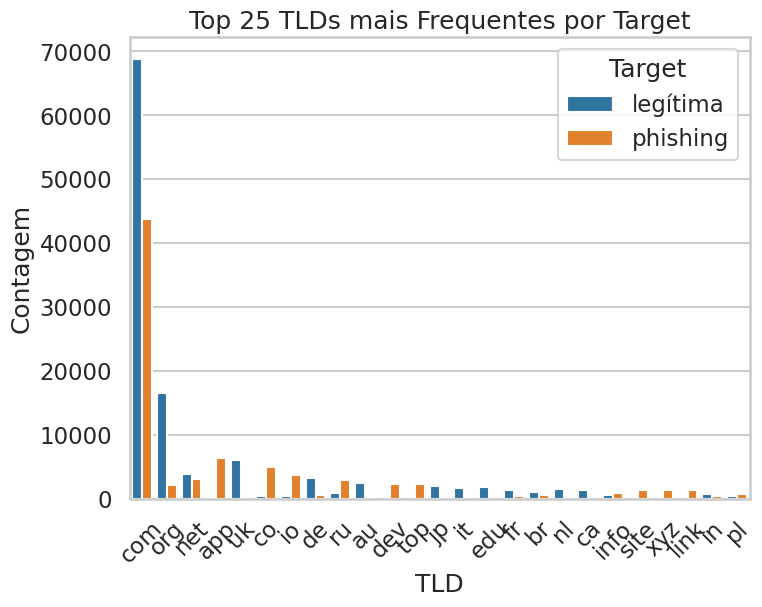

In [100]:
plt.figure(figsize=(8, 6))

# definindo o estilo do gráfico
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette(sns.color_palette(["#1f77b4", "#ff7f0e"]))

#Obtendo os 25 maiores
tld_counts = dataframe['TLD'].value_counts().head(25).reset_index()
tld_counts.columns = ['TLD', 'count']

# trocando o nome da coluna target para ficar deixar mais claro no gráfico
tld_counts = tld_counts.merge(dataframe[['TLD', 'target']], on='TLD', how='left')
tld_counts['target'] = tld_counts['target'].map({0: 'phishing', 1: 'legítima'})



sns.countplot(data=tld_counts, x='TLD', hue='target', palette=["#1f77b4", "#ff7f0e"])
plt.title('Top 25 TLDs mais Frequentes por Target')
plt.xlabel('TLD')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.show()

A variável TLD contém 695 categoriais unicas. Contudo, ao analisarmos os 20 valores mais frequentes, observamos que eles representam 81% do total.

Adicionalmente, no gráfico acima observamos que alguns TLD aparecem de forma expressiva nas URLs de phishing, por exemplo: dev, top, site, xyz, link, io, co.

Vamos investigar quais são os domínios mais arriscados.

In [101]:
tld_counts = dataframe.groupby(['TLD', 'target']).size().unstack(fill_value=0)


tld_counts.columns = ['count_phishing', 'count_legitima']

tld_counts['total'] = tld_counts['count_phishing'] + tld_counts['count_legitima']

tld_counts['phishing_perc'] = tld_counts['count_phishing'] / tld_counts['total']

tld_counts = tld_counts.sort_values(by='phishing_perc', ascending=False)

filtered_tlds = tld_counts[(tld_counts['phishing_perc'] >= 0.90) & (tld_counts['phishing_perc'] < 1.0)]
filtered_tlds100 = tld_counts[tld_counts['phishing_perc'] == 1.00]

In [102]:
# Obtendo os valores únicos do índice e convertendo em lista
unique_indices_list = filtered_tlds100.index.unique().to_list()

# Exibindo todos os índices únicos
for idx in unique_indices_list:
    print(idx)

100
com:2096
tax
cards
support
cc:8443
cf
cfd
stream
soy
software
coach
skin
com:4000
buzz
com:443
com:9595
condos
consulting
sexy
sbs
salon
cyou
date
dental
review
cam
builders
repair
xn--6frz82g
86
87
94
95
yt
yachts
xn--p1ai
xn--p1acf
xn--mk1bu44c
xn--c1avg
xn--90ais
archi
tel
autos
video
vet
ventures
beauty
trading
trade
tours
bid
black
bond
rest
download
80:8085
icu
monster
mom
hair
101
miami
healthcare
holdings
markets
homes
host
hosting
makeup
moscow
maison
lundbeck
industries
investments
lol
loan
limo
limited
legal
lat
land:443
gq
goog
recipes
page
racing
quest
promo
engineering
place
pl:443
expert
pink
photos
fit
parts
fr:443
ms
fyi
nr
nf
gay
gdn
gf
navy
gift
gifts
gle
gmbh
84
kred
80
166
78
20
199
198
197
196
189
188:10003
187
185
184
182
181
178
177
173
171
203
206
21
225
235
234
233
232
231
230
227
223
210
222
221
220
216
214
211:8383
211
167
165
238
163
128
126:8080
126
125
123
121
120
12
117
116
111
110
11
108
107
106
103
13
130
133:8080
150
162
161
160
158
155
154
151
15

In [103]:
# Obtendo os valores únicos do índice e convertendo em lista
unique_indices_list = filtered_tlds100.index.unique().to_list()

# Exibindo todos os índices únicos
for idx in unique_indices_list:
    print(idx)

100
com:2096
tax
cards
support
cc:8443
cf
cfd
stream
soy
software
coach
skin
com:4000
buzz
com:443
com:9595
condos
consulting
sexy
sbs
salon
cyou
date
dental
review
cam
builders
repair
xn--6frz82g
86
87
94
95
yt
yachts
xn--p1ai
xn--p1acf
xn--mk1bu44c
xn--c1avg
xn--90ais
archi
tel
autos
video
vet
ventures
beauty
trading
trade
tours
bid
black
bond
rest
download
80:8085
icu
monster
mom
hair
101
miami
healthcare
holdings
markets
homes
host
hosting
makeup
moscow
maison
lundbeck
industries
investments
lol
loan
limo
limited
legal
lat
land:443
gq
goog
recipes
page
racing
quest
promo
engineering
place
pl:443
expert
pink
photos
fit
parts
fr:443
ms
fyi
nr
nf
gay
gdn
gf
navy
gift
gifts
gle
gmbh
84
kred
80
166
78
20
199
198
197
196
189
188:10003
187
185
184
182
181
178
177
173
171
203
206
21
225
235
234
233
232
231
230
227
223
210
222
221
220
216
214
211:8383
211
167
165
238
163
128
126:8080
126
125
123
121
120
12
117
116
111
110
11
108
107
106
103
13
130
133:8080
150
162
161
160
158
155
154
151
15

In [104]:
# Obtendo os valores únicos do índice e convertendo em lista
unique_indices_list90 = filtered_tlds.index.unique().to_list()

# Exibindo todos os índices únicos
for idx in unique_indices_list90:
    print(idx)

top
ml
site
ga
link
gd
fun
win
gp
dev
xyz
tk
ly
app
cloud
work
click
pw
lc
shop
vip
finance
services
vg
club
land
bio
live
ink
online
website
zone
best
vu
gy
digital
ht
fund
social
co
tl
ws
cx
email


Com base nas duas listas acima conseguimos deixar a primeira sugestão para a população sobre as URLs de phishing.

O TLD de um site pode ser encontrado da seguinte forma:
* Exemplos:
  * https://www.google.com -> TLD = `**com**`
  * https://www.example.com -> TLD = `**com**`
  * https://www.example.org -> TLD = `**org**`
  * https://example.co.uk -> TLD = `**co.uk**`

**Dica 1:**

Se o TLD da URL do site que você está visitando ou pensando em visitar, for numérico (100, 101, 80, 166, 78, 20, 199, 189) ou estiver na lista abaixo, é **phishing**:
* `com:2096`
* `tax`
* `cards`
* `support`
* `cc:8443`
* `cf`
* `cfd`
* `stream`
* `soy`
* `software`
* `coach`
* `skin`
* `com:4000`
* `buzz`
* `com:443`
* `com:9595`
* `condos`
* `consulting`
* `sexy`
* `sbs`
* `salon`
* `cyou`
* `date`
* `dental`
* `review`
* `cam`
* `builders`
* `repair`
* `xn--6frz82g`
* `yt`
* `yachts`
* `xn--p1ai`
* `xn--p1acf`
* `xn--mk1bu44c`
* `xn--c1avg`
* `xn--90ais`
* `archi`
* `tel`
* `autos`
* `video`
* `vet`
* `ventures`
* `beauty`
* `trading`
* `trade`
* `tours`
* `bid`
* `black`
* `bond`
* `rest`
* `download`
* `80:8085`
* `icu`
* `monster`
* `mom`
* `hair`
* `miami`
* `healthcare`
* `holdings`
* `markets`
* `homes`
* `host`
* `hosting`
* `makeup`
* `moscow`
* `maison`
* `lundbeck`
* `industries`
* `investments`
* `lol`
* `loan`
* `limo`
* `limited`
* `legal`
* `lat`
* `land:443`
* `gq`
* `goog`
* `recipes`
* `page`
* `racing`
* `quest`
* `promo`
* `engineering`
* `place`
* `pl:443`
* `expert`
* `pink`
* `photos`
* `fit`
* `parts`
* `fr:443`
* `ms`
* `fyi`
* `nr`
* `nf`
* `gay`
* `gdn`
* `gf`
* `navy`
* `gift`
* `gifts`
* `gle`
* `gmbh`
* `kred`
* `188:10003`
* `211:8383`
* `126:8080`
* `133:8080`
* `254:30332`
* `249:8080`
* `68:8080`
* `240:8087`


Se estiver na lista abaixo, corre um grande risco de ser phishing:
* `top`
* `ml`
* `site`
* `ga`
* `link`
* `gd`
* `fun`
* `win`
* `gp`
* `dev`
* `xyz`
* `tk`
* `ly`
* `app`
* `cloud`
* `work`
* `click`
* `pw`
* `lc`
* `shop`
* `vip`
* `finance`
* `services`
* `vg`
* `club`
* `land`
* `bio`
* `live`
* `ink`
* `online`
* `website`
* `zone`
* `best`
* `vu`
* `gy`
* `digital`
* `ht`
* `fund`
* `social`
* `co`
* `tl`
* `ws`
* `cx`
* `email`

### Variáveis do tipo Float
       'ObfuscationRatio','LetterRatioInURL', 'DegitRatioInURL', 'TLDLegitimateProb'


In [105]:
dataframe_float64 = dataframe.select_dtypes(include=['float64'])
dataframe_float64.describe()



,TLDLegitimateProb,ObfuscationRatio,LetterRatioInURL,DegitRatioInURL
count,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.260423,0.000138,0.515946,0.028616
std,0.251628,0.003817,0.123315,0.070897
min,0.000000,0.000000,0.000000,0.000000
25%,0.005977,0.000000,0.435000,0.000000
50%,0.079963,0.000000,0.519000,0.000000
75%,0.522907,0.000000,0.594000,0.000000
max,0.522907,0.348000,0.926000,0.684000


In [106]:
dataframe_float0 = dataframe_float64.copy()  # Copia para manter os dados intactos
dataframe_float0['target'] = dataframe['target']  # Adiciona a coluna 'target'
dataframe_float0['target_label'] = dataframe_float0['target'].map({0: 'phishing', 1: 'legítima'})  # Mapeia para rótulos

# Verificando a contagem de cada classe
print(dataframe_float0['target'].value_counts())  # Exibe a contagem das classes

# Quebrando o describe por 'target'
describe_legitima = dataframe_float0[dataframe_float0['target_label'] == 'legítima'].describe()  # Estatísticas para 'legítima'
describe_phishing = dataframe_float0[dataframe_float0['target_label'] == 'phishing'].describe()  # Estatísticas para 'phishing'

# Adicionando um prefixo para identificar os grupos
describe_legitima.columns = [f'legítima_{col}' for col in describe_legitima.columns]  # Prefixa colunas de 'legítima'
describe_phishing.columns = [f'phishing_{col}' for col in describe_phishing.columns]  # Prefixa colunas de 'phishing'

# Concatenando as duas tabelas lado a lado
describe_combined = pd.concat([describe_legitima, describe_phishing], axis=1)

# Reorganizar as colunas para que cada variável esteja lado a lado
column_order = []
for col in describe_legitima.columns:
    column_order.append(col)  # Adiciona 'legítima_...'
    column_order.append(col.replace('legítima', 'phishing'))  # Adiciona 'phishing_...'

# Reorganizar as colunas do DataFrame
describe_combined = describe_combined[column_order]
describe_combined


target
1    134850
0    100945
Name: count, dtype: int64


,legítima_TLDLegitimateProb,phishing_TLDLegitimateProb,legítima_ObfuscationRatio,phishing_ObfuscationRatio,legítima_LetterRatioInURL,phishing_LetterRatioInURL,legítima_DegitRatioInURL,phishing_DegitRatioInURL,legítima_target,phishing_target
count,1.348500e+05,100945.000000,134850.0,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.0,100945.0
mean,2.816254e-01,0.232099,0.0,0.000323,0.476705,0.568366,0.002115,0.064018,1.0,0.0
std,2.471322e-01,0.254775,0.0,0.005829,0.095166,0.136445,0.014682,0.096238,0.0,0.0
min,6.000000e-07,0.000000,0.0,0.000000,0.056000,0.000000,0.000000,0.000000,1.0,0.0
25%,1.801320e-02,0.001502,0.0,0.000000,0.409000,0.478000,0.000000,0.000000,1.0,0.0
50%,5.229071e-01,0.018013,0.0,0.000000,0.480000,0.577000,0.000000,0.000000,1.0,0.0
75%,5.229071e-01,0.522907,0.0,0.000000,0.552000,0.676000,0.000000,0.102000,1.0,0.0
max,5.229071e-01,0.522907,0.0,0.348000,0.772000,0.926000,0.348000,0.684000,1.0,0.0


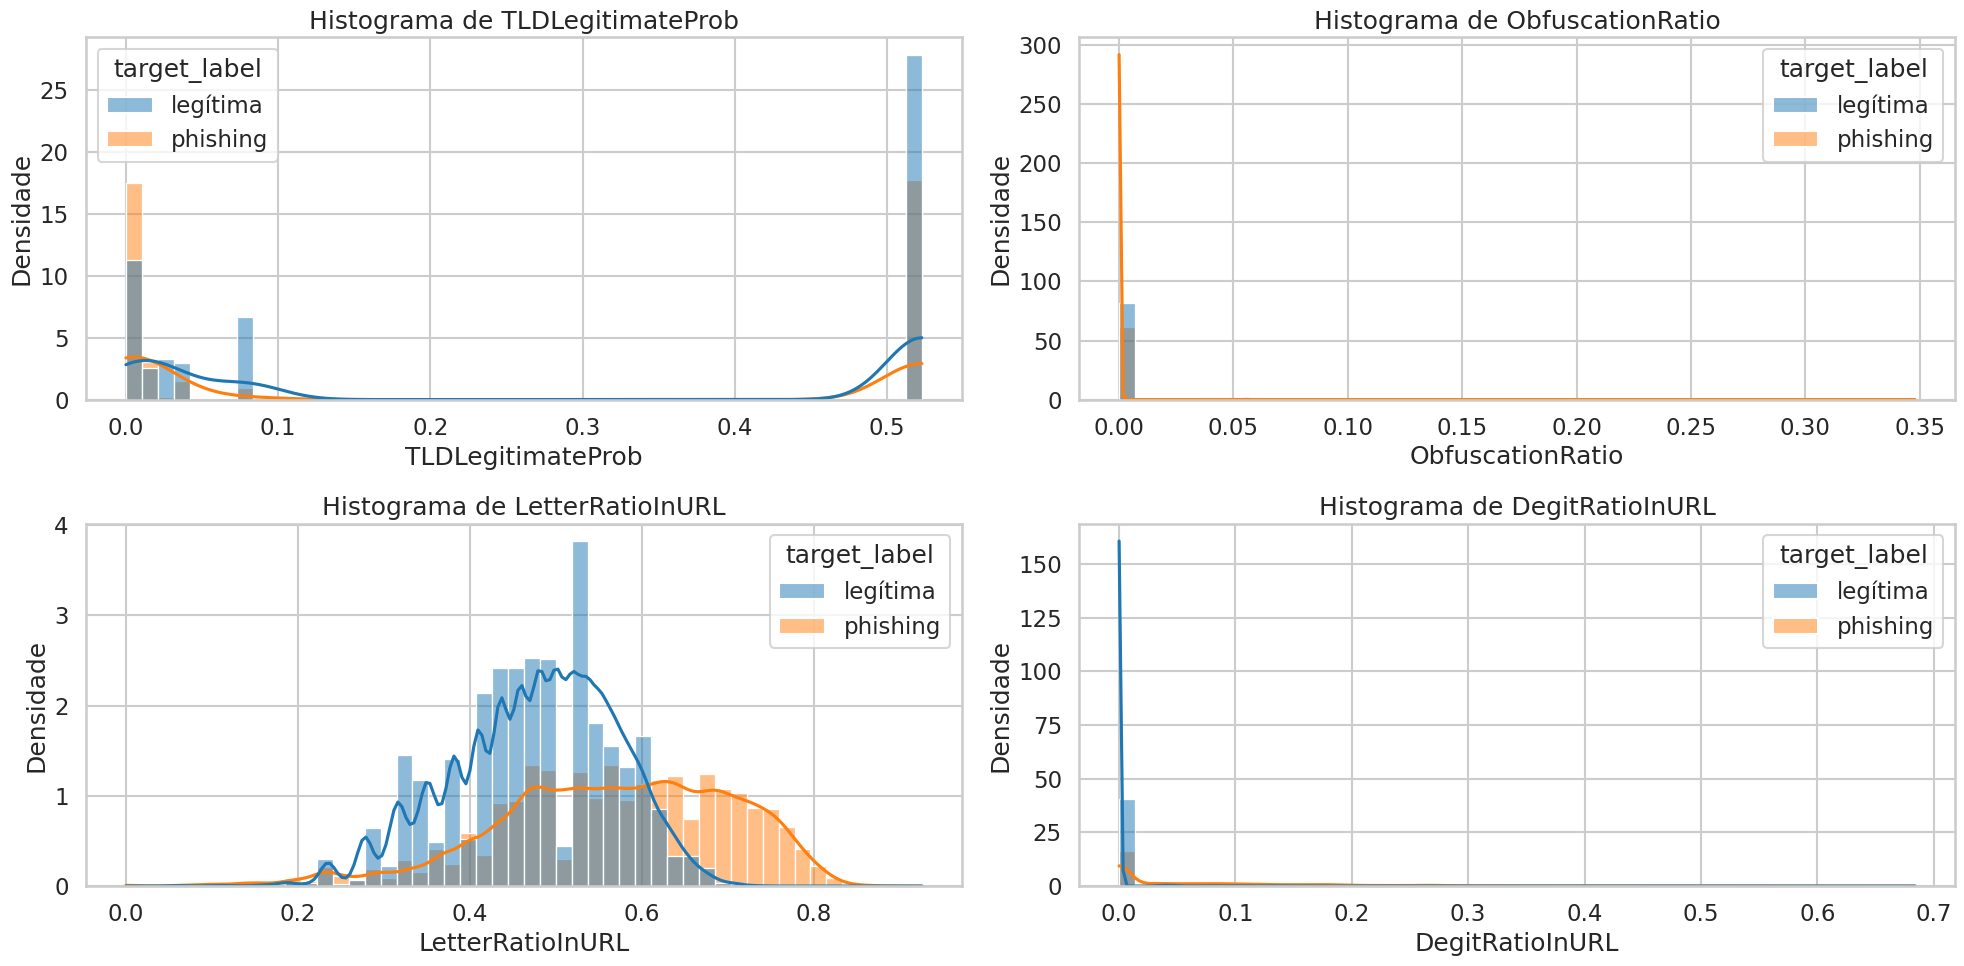

In [107]:
dataframe_float64['target'] = dataframe['target']
dataframe_float64['target_label'] = dataframe_float64['target'].map({0: 'phishing', 1: 'legítima'})
columns_to_plot = [col for col in dataframe_float64.columns if col != 'target' and col != 'target_label' and dataframe_float64[col].dtype == 'float64']


plt.figure(figsize=(20, 10))

# Plotando histogramas para cada coluna float64
num_columns = len(columns_to_plot)
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot((num_columns + 1) // 2, 2, i)  # 2 colunas por linha
    sns.histplot(data=dataframe_float64, x=column, hue='target_label', bins=50, kde=True, stat='density', alpha=0.5)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

Com base no observado acima, a feature que mais demonstra potencial para separar entre URLs de phishing e legítimas é a LetterRatioInURL. Observa-se que as URLs de phishing possuem uma razão maior.

Com base nisso conseguimos deixar a segunda dica para a populaçao:



**Dica 2:**

Desconfie de URLs com muitas letras.

### Variáveis do tipo inteiro

#### Flags


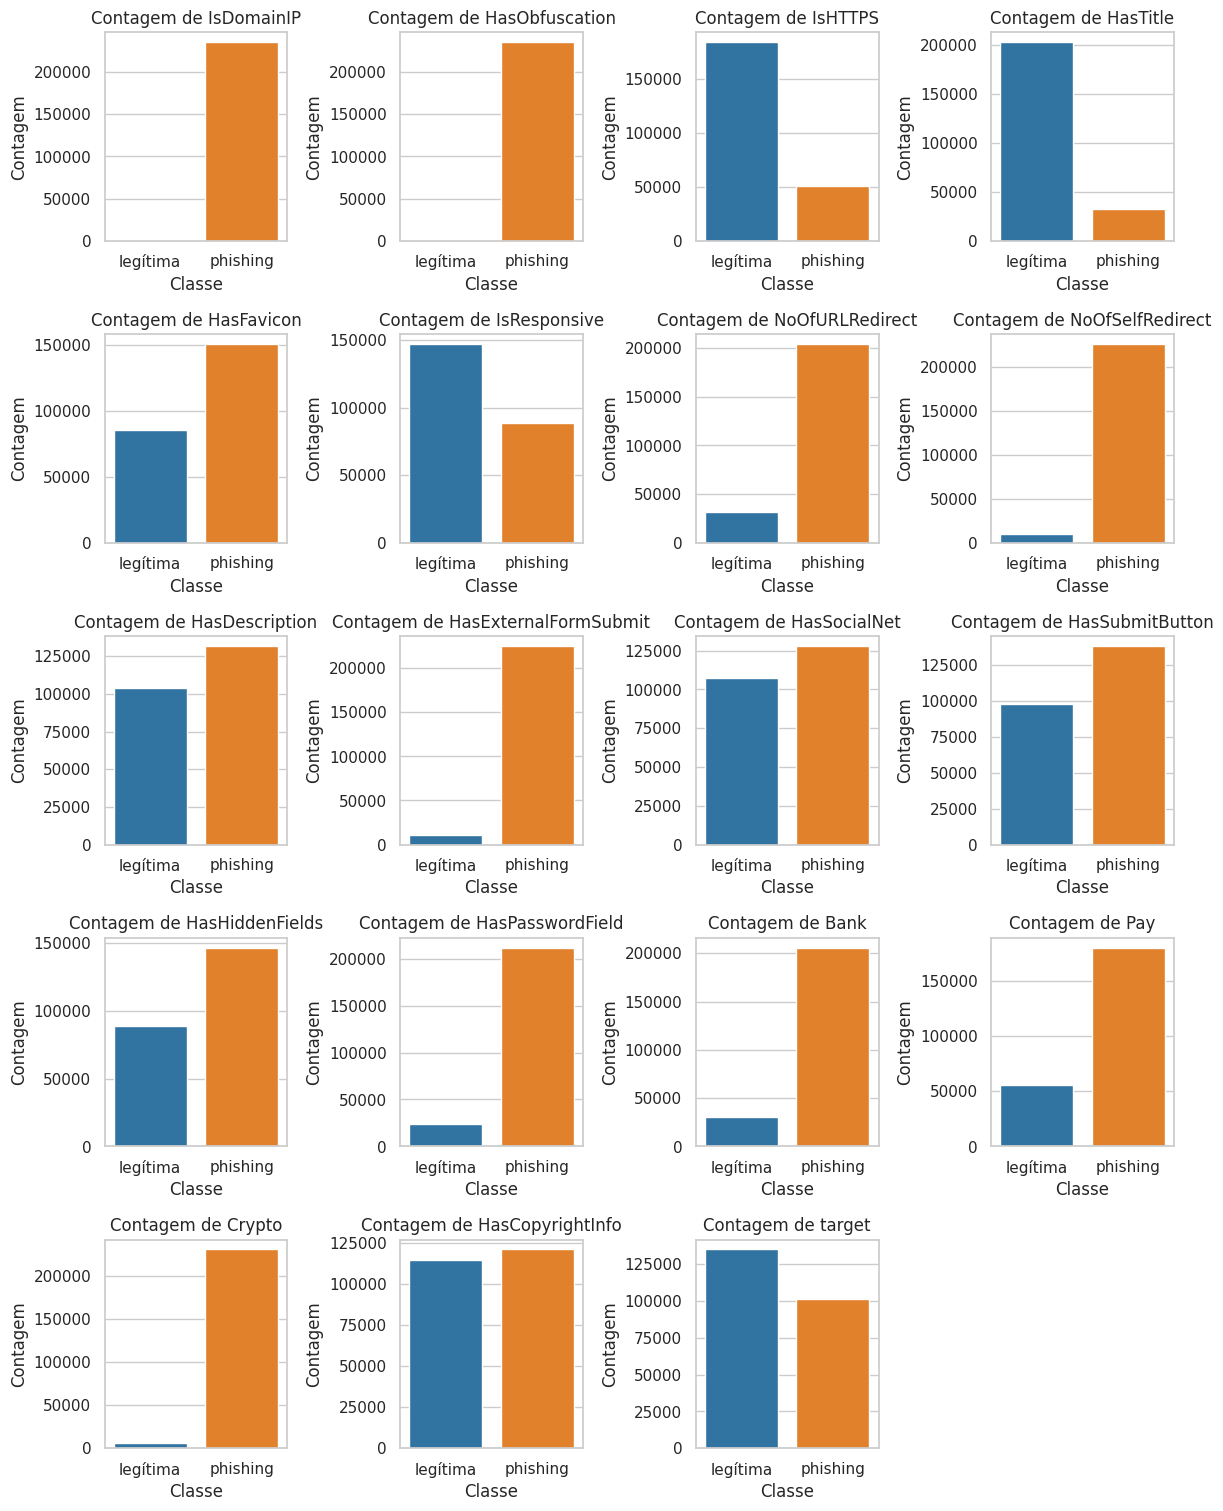

In [108]:
dataframe_int64_flag = dataframe.select_dtypes(include=['int64']).drop(columns=[ 'URLLength',
                                                                           'DomainLength',
                                                                           'NoOfPopup',
                                                                           'NoOfiFrame',
                                                                           'TLDLength',
                                                                           'NoOfSubDomain',
                                                                           'NoOfObfuscatedChar',
                                                                           'NoOfLettersInURL',
                                                                           'NoOfDegitsInURL',
                                                                           'NoOfEqualsInURL',
                                                                           'NoOfOtherSpecialCharsInURL',
                                                                           'NoOfImage',
                                                                           'NoOfSelfRef',
                                                                           'NoOfEmptyRef',
                                                                           'NoOfExternalRef'])

dataframe_int64_flag_mapped = dataframe_int64_flag.replace({0: 'phishing', 1: 'legítima'})
count_flags = dataframe_int64_flag_mapped.apply(pd.Series.value_counts).fillna(0)

sns.set(style="whitegrid")

# Criando os gráficos de barras
num_flags = count_flags.shape[1]
plt.figure(figsize=(12, num_flags * 3))  # Ajuste o tamanho da figura conforme necessário

for i, column in enumerate(count_flags.columns, 1):
    plt.subplot(num_flags, 4, i)  # Subplots em uma coluna
    sns.barplot(x=count_flags.index, y=count_flags[column], hue=count_flags.index, palette=["#1f77b4", "#ff7f0e"], errorbar=None)
    plt.title(f'Contagem de {column}')
    plt.xlabel('Classe')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()



A maior parte das flags consegue descriminar bem entre URLs legítimas e de phishing. Observa-se que o uso de um IP ao invés de um domínio,  conter algum ofuscação na URL são características marcantes de uma URL de phishing.

Contudo, a presença de Copyright na página, bem como redes sociais e descrição são variável que discrimam menos entre as URLs legitimas e de phishing.

Por último, HTTPs, ser responsiva e ter um título são características que identificam de forma mais efetiva as URLs legítimas.

**Dica 3**:

Desconfie de sites em que a URL é um endereço de IP:
* **Exemplo 1**: `192.182.1.1`
- **Exemplo 2**: `10.0.0.999`
- **Exemplo 3**: `172.19.999.1`
- **Exemplo 4**: `2001:0ab8:85c3:0000:0000:7d8e:0680:7431`
- **Exemplo 5**: `ab80::1c2d:3e4f:5e6g:7h8i`
- **Exemplo 6**: `::1`

**Dica 4**: Desconfie de URLs com obfuscação
* URL Exemplo: `https://www.exemplo.com/login`
* URL Obfuscada 1: `https://www.exemplo.com/login?ref=12345&session_id=abcde`
* URL Obfuscada 2: `https://exemplo.com.palavra.com`
* URL Obfuscada 3: `https://exemplo.xyz123.com`
* URL Obfuscada 4: `https://www.exemplo.com/%6a%6b%67%69%6c`

**Dica 5**: Certifique-se de que a URL é segura protocolo HTTPs
* `https://`


**Dica 6**: Verifique a presença de título, isso deixa a URL mais confiável.
* `www.exemplo.com/exemplo/identificando-phishing`

**Dica 7**: Tenha cuidado redobrado com sites onde exista:
* Submissão de formulários
* Campos para input de senhas
* Dados bancários
* Dados de pagamento




#### Numéricas


In [109]:
dataframe_int64_num0 = dataframe.select_dtypes(include=['int64']).drop(columns=['IsDomainIP',
                                                                           'HasObfuscation',
                                                                           'IsHTTPS',
                                                                           'HasTitle',
                                                                           'HasFavicon',
                                                                           'IsResponsive',
                                                                           'NoOfURLRedirect',
                                                                           'NoOfSelfRedirect',
                                                                           'HasDescription',
                                                                           'HasExternalFormSubmit',
                                                                           'HasSocialNet',
                                                                           'HasSubmitButton',
                                                                           'HasHiddenFields',
                                                                           'HasPasswordField',
                                                                           'Bank',
                                                                           'Pay',
                                                                           'Crypto',
                                                                           'HasCopyrightInfo'])


In [110]:
#checando se o drop funcionou
dataframe_int64_num0.columns

Index(['URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain',
       'NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDegitsInURL',
       'NoOfEqualsInURL', 'NoOfOtherSpecialCharsInURL', 'NoOfPopup',
       'NoOfiFrame', 'NoOfImage', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'target'],
      dtype='object')

In [111]:
# desconsiderar a coluna de target
describe_num = dataframe_int64_num0.describe()

describe_num

,URLLength,DomainLength,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfOtherSpecialCharsInURL,NoOfPopup,NoOfiFrame,NoOfImage,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,target
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,2.764456,1.164758,0.024861,19.428919,1.881011,0.062241,2.340198,0.221765,1.588638,26.075689,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.599739,0.600969,1.876249,29.090330,11.886695,0.934704,3.527603,3.870540,5.762561,79.411815,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,2.000000,1.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,3.000000,1.000000,0.000000,14.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,3.000000,1.000000,0.000000,20.000000,0.000000,0.000000,3.000000,0.000000,1.000000,29.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,13.000000,10.000000,447.000000,5191.000000,2011.000000,176.000000,499.000000,602.000000,1602.000000,8956.000000,27397.000000,4887.000000,27516.000000,1.000000


In [112]:
# trocando o nome para deixar mais legível
dataframe_int64_num = dataframe_int64_num0.copy()
dataframe_int64_num['target'] = dataframe_int64_num0['target'].map({0: 'phishing', 1: 'legítima'})

# Verificando a contagem de cada classe
print(dataframe_int64_num['target'].value_counts())

# Quebrando o describe por 'target'
describe_legitima = dataframe_int64_num[dataframe_int64_num['target'] == 'legítima'].describe()
describe_phishing = dataframe_int64_num[dataframe_int64_num['target'] == 'phishing'].describe()

# Adicionando um prefixo para identificar os grupos
describe_legitima.columns = [f'legítima_{col}' for col in describe_legitima.columns]
describe_phishing.columns = [f'phishing_{col}' for col in describe_phishing.columns]

# Concatenando as duas tabelas lado a lado
describe_combined = pd.concat([describe_legitima, describe_phishing], axis=1)

# Reorganizar as colunas para que cada variavel esteja lado a lado
column_order = []
for col in describe_legitima.columns:
    # Para cada coluna de 'legítima', adicionar a correspondente de 'phishing'
    column_order.append(col)  # Adiciona 'legítima_...'
    column_order.append(col.replace('legítima', 'phishing'))  # Adiciona 'phishing_...'

# Reorganizar as colunas do DataFrame
describe_combined = describe_combined[column_order]

# Exibindo a tabela combinada
describe_combined


target
legítima    134850
phishing    100945
Name: count, dtype: int64


,legítima_URLLength,phishing_URLLength,legítima_DomainLength,phishing_DomainLength,legítima_TLDLength,phishing_TLDLength,legítima_NoOfSubDomain,phishing_NoOfSubDomain,legítima_NoOfObfuscatedChar,phishing_NoOfObfuscatedChar,legítima_NoOfLettersInURL,phishing_NoOfLettersInURL,legítima_NoOfDegitsInURL,phishing_NoOfDegitsInURL,legítima_NoOfEqualsInURL,phishing_NoOfEqualsInURL,legítima_NoOfOtherSpecialCharsInURL,phishing_NoOfOtherSpecialCharsInURL,legítima_NoOfPopup,phishing_NoOfPopup,legítima_NoOfiFrame,phishing_NoOfiFrame,legítima_NoOfImage,phishing_NoOfImage,legítima_NoOfSelfRef,phishing_NoOfSelfRef,legítima_NoOfEmptyRef,phishing_NoOfEmptyRef,legítima_NoOfExternalRef,phishing_NoOfExternalRef
count,134850.000000,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.0,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.0,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000,134850.000000,100945.000000
mean,26.228610,45.720293,19.228610,24.465144,2.723382,2.819327,1.161661,1.168894,0.0,0.058071,12.933059,28.106583,0.050597,4.326217,0.0,0.145386,1.244835,3.803467,0.380467,0.009758,2.714535,0.084581,44.946600,0.866492,113.410241,0.496032,4.044887,0.150379,85.294601,1.128119
std,4.815612,61.145523,4.815612,12.204054,0.516913,0.691359,0.404076,0.790880,0.0,2.867251,4.782969,42.597033,0.350326,17.872527,0.0,1.424329,0.503961,4.998448,5.110220,0.173007,7.409595,0.519529,100.930539,3.296497,221.635349,3.168894,23.136610,1.781620,205.669475,3.204587
min,15.000000,13.000000,8.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,26.000000,16.000000,16.000000,2.000000,2.000000,1.000000,1.000000,0.0,0.000000,9.000000,13.000000,0.000000,0.000000,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,35.000000,0.000000,0.000000,0.000000,17.000000,0.000000
50%,26.000000,34.000000,19.000000,22.000000,3.000000,3.000000,1.000000,1.000000,0.0,0.000000,13.000000,20.000000,0.000000,0.000000,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,25.000000,0.000000,76.000000,0.000000,1.000000,0.000000,46.000000,0.000000
75%,29.000000,48.000000,22.000000,29.000000,3.000000,3.000000,1.000000,1.000000,0.0,0.000000,16.000000,31.000000,0.000000,5.000000,0.0,0.000000,1.000000,5.000000,0.000000,0.000000,3.000000,0.000000,47.000000,0.000000,140.000000,0.000000,3.000000,0.000000,106.000000,1.000000
max,57.000000,6097.000000,50.000000,110.000000,13.000000,13.000000,4.000000,10.000000,0.0,447.000000,44.000000,5191.000000,8.000000,2011.000000,0.0,176.000000,7.000000,499.000000,602.000000,10.000000,1602.000000,25.000000,8956.000000,158.000000,27397.000000,120.000000,4887.000000,91.000000,27516.000000,368.000000


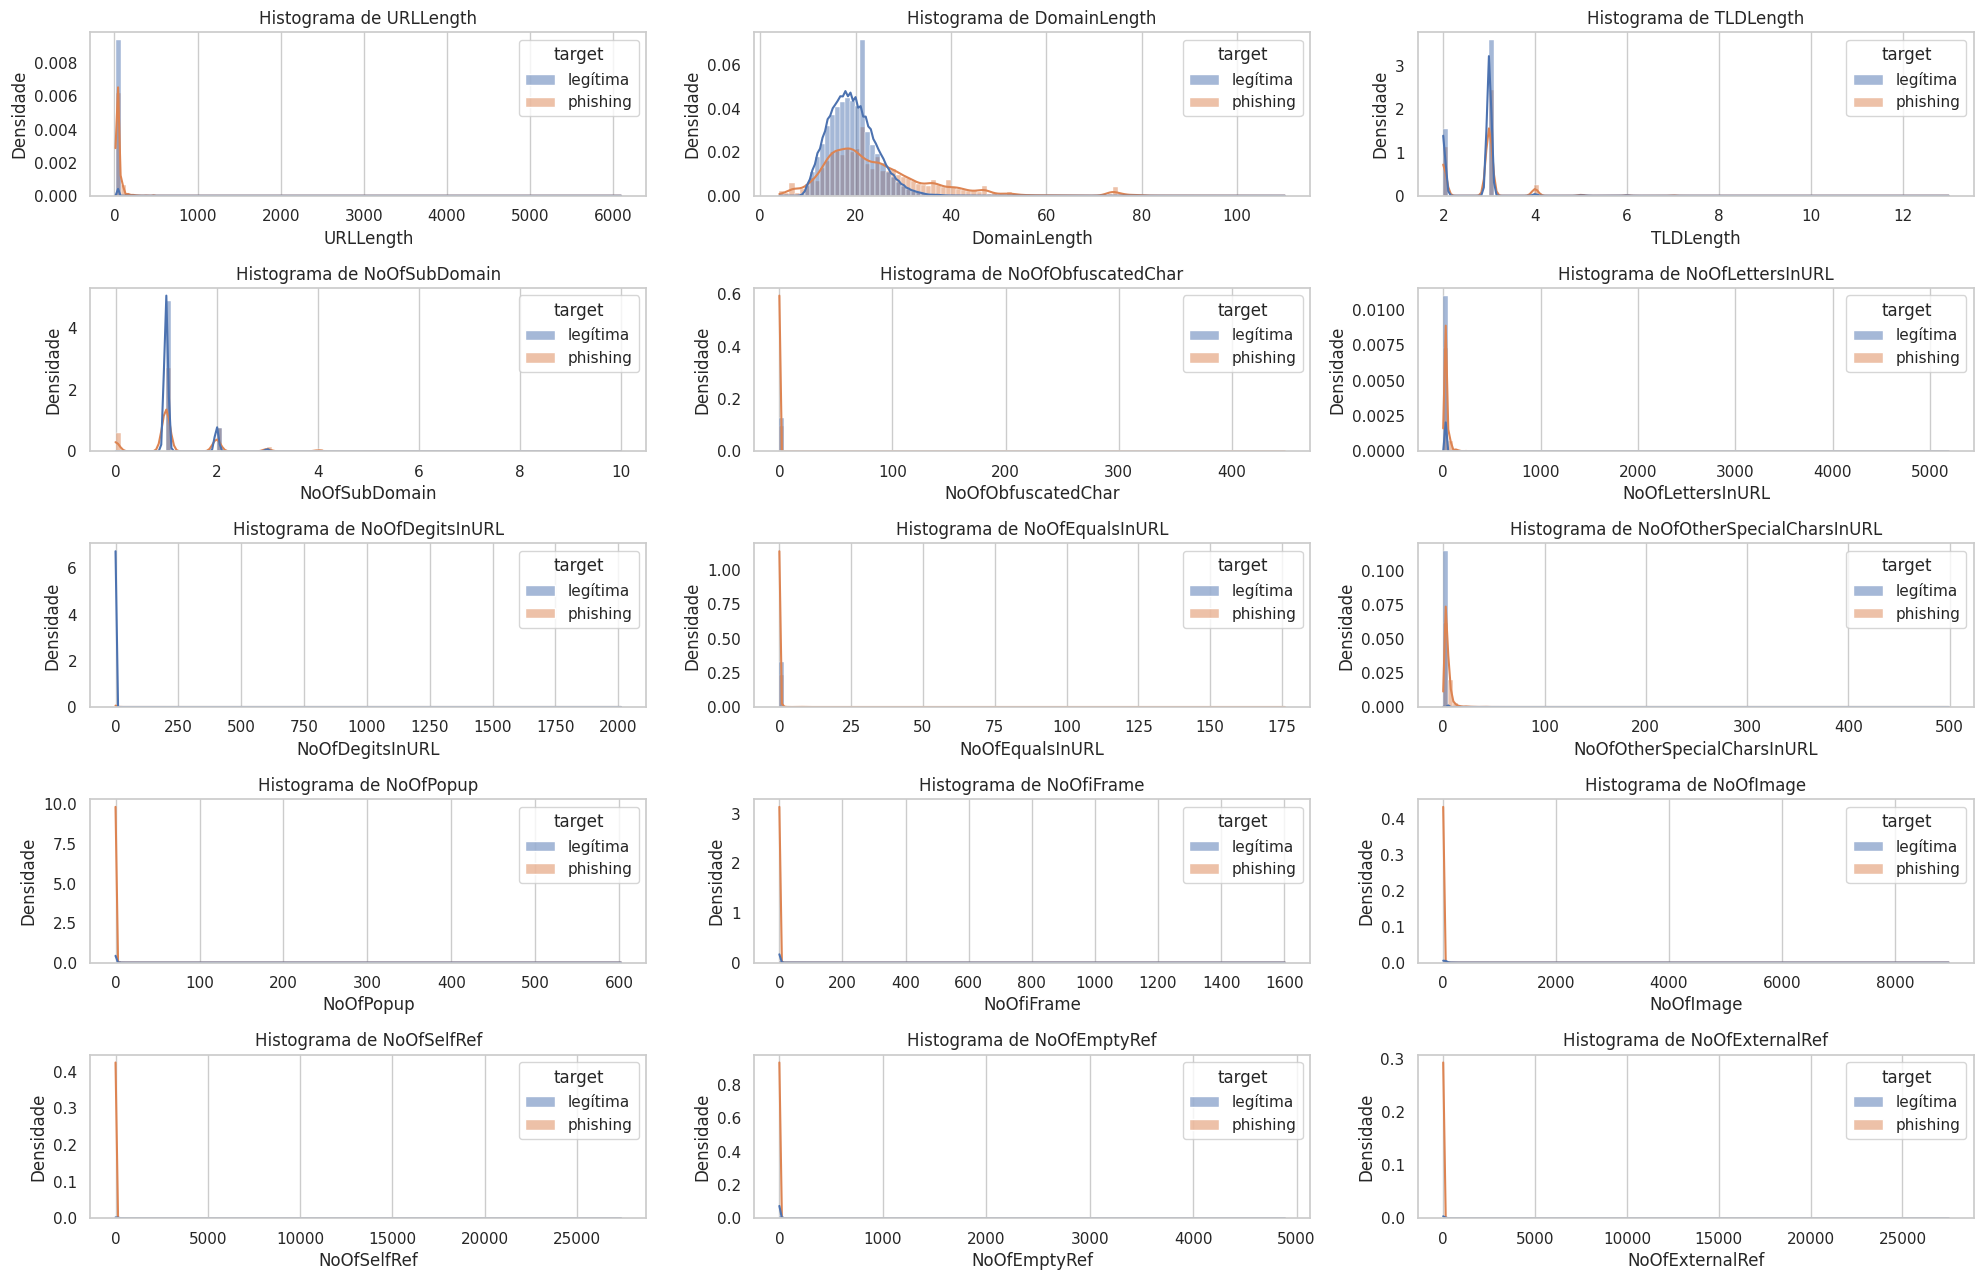

In [113]:
plt.figure(figsize=(20, 15))

dataframe_int64_num['target'] = dataframe_int64_num0['target'].map({0: 'phishing', 1: 'legítima'})


# Plotando a distribuição de todas as features do dataset
for i, column in enumerate(dataframe_int64_num.columns.drop('target'), 1):
    plt.subplot(len(dataframe_int64_num.columns) // 3 + 1, 3, i)  # 3 colunas por linha
    # Plota o histograma com a densidade ajustada e KDE
    sns.histplot(data=dataframe_int64_num, x=column, hue='target', bins=100, kde=True, stat='density', alpha=0.5)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidade')
    plt.grid(axis='y')  # Adiciona grid apenas no eixo y para melhor visualização

plt.tight_layout()
plt.show()


Analisando a tabela com os dados descritivos, bem como o histograma, conseguimos observar que as variáveis TLDLength, NoOfSubDomain,  NoOfObfuscatedChar, NoOfDegitsInURL, NoOfEqualsInURL, NoOfPopup não conseguem discriminar bem entre URLs legítimas. Por outro lado as variáveis NoOfiFrame, NoOfImage, NoOfSelfRef, NoOfEmptyRef, NoOfExternalRef parecem discriminar URLs legítimas, enquanto URLLength, DomainLength, NoOfLettersInURL, NoOfOtherSpecialCharsInURL parece discriminar as URLs de phishing.

**Dica 8**: cuidado com URLs com imagens. Procure pelas extensões na URL, se houver desconfie.
* .jpg ou .jpeg (JPEG)
* .png (PNG)
* .gif (GIF)
* .bmp (Bitmap)
* .svg (SVG)
* .webp (WebP)

**Dica 9**: desconfie de URLs longas
* Exemplo: `https://www.exemplo.com/exemplo/?q=exemplo&tipo=exemplo&preco=500&preco_max=2000&ordem=mais_vendidos&classificacao=5&oferta=true&promo_codigo=DESC20&pagina=3&sort=desc`

**Dica 10**: desconfie de dominios longos
* Exemplo: `https://www.exemplo-de-uma-url-com-um-domínio-muito-longo.com/exemplo/exemplo/exemplo-de-url?usuario=admin&token=abc123xyz`

**Dica 11**: desconfie de URLs com muitas letras
* Exemplo: `https://www.exemploabcdefghijklmnopqrstuvwxyzexemplo.com/exemplo/deURLcom/muitasemuitasemuitasletras?parametro1=valor1&parametro2=valor2&parametro3=valor3`

**Dica 12**: desconfie de URLs com muitos caracteres especiais
* Exemplo: `https://www.exemplo.com/exemplo?param1=valor1&param2=valor2&param3=%E2%9C%93&param4=%24%40%23%25%5E%26*%28%29%2B%3D&param5=%C3%A1%C3%A9%C3%AD%C3%B3%C3%BA%C3%A7
`



## Avaliando correlação

Para a próxima etapa mantive apenas características que podem ser observadas por uma pessoa na URL, usando os aprendizados da análise exploratória.

In [114]:

colunas_mantidas = ['URLLength',
                    'DomainLength',
                    'IsDomainIP',
                    'HasObfuscation',
                    'NoOfLettersInURL',
                    'NoOfOtherSpecialCharsInURL',
                    'IsHTTPS',
                    'HasTitle',
                    'IsResponsive',
                    'HasExternalFormSubmit',
                    'HasSubmitButton',
                    'HasHiddenFields',
                    'HasPasswordField',
                    'Bank',
                    'Pay',
                    'Crypto',
                    'target']

final_dataframe = dataframe[colunas_mantidas]


Para identificar relações entre essas variáveis e entender se podemos gerar mais recomendações vamos plotar uma árvore de decisão.


In [115]:
colunas_mantidas_tree = ['URLLength',
                    'DomainLength',
                    'IsDomainIP',
                    'HasObfuscation',
                    'NoOfLettersInURL',
                    'NoOfOtherSpecialCharsInURL',
                    'IsHTTPS',
                    'HasTitle',
                    'IsResponsive',
                    'HasExternalFormSubmit',
                    'HasSubmitButton',
                    'HasHiddenFields',
                    'HasPasswordField',
                    'Bank',
                    'Pay',
                    'Crypto']

X = X[colunas_mantidas_tree]
y=y

#separando 30% para o teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

# modelo
model = DecisionTreeClassifier(max_leaf_nodes=5,random_state=2024)

# Treinando o modelo
model.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=5, random_state=2024)

In [116]:
#criando a predição
y_pred = model.predict(X_test)


In [117]:
#avaliando o resultado com a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

print(matriz_confusao)

[[28844  1509]
 [ 1184 39202]]


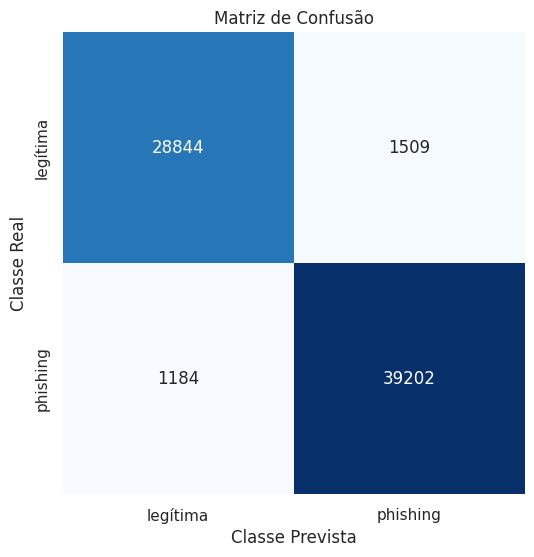

In [118]:
matriz_confusao = pd.DataFrame(matriz_confusao, index=['legítima', 'phishing'], columns=['legítima', 'phishing'])

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

In [119]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96     30353
           1       0.96      0.97      0.97     40386

    accuracy                           0.96     70739
   macro avg       0.96      0.96      0.96     70739
weighted avg       0.96      0.96      0.96     70739



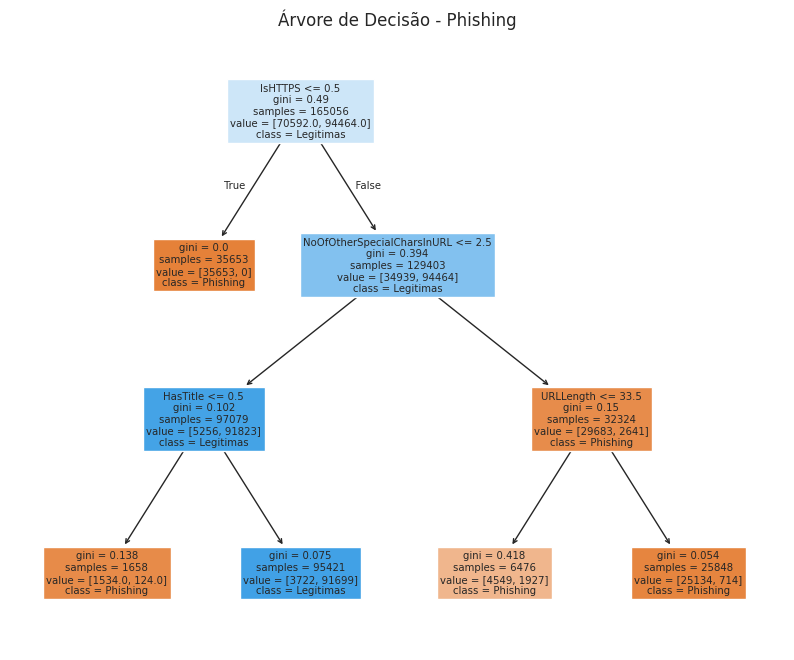

In [120]:
plt.figure(figsize=(10, 8))
tree.plot_tree(model, filled=True, feature_names=colunas_mantidas_tree, class_names=['Phishing', 'Legitimas'])
plt.title('Árvore de Decisão - Phishing')
plt.show()

Com base na árvore de decisão acima podemos concluir que os fatores principais a serem observados na URL são:

[1] Desconfie de qualquer url que não use o protocolo https.

[2] Desconfie de URLs com mais de 3 caracteres especiais, mesmo com o protocolo https.

[3]  Desconfie de URLs muito longas.

[4] Desconfie de URLs sem título.

Ao longo desse MVP observamos que alguns TLD são usados apenas por URLs de phishing. Também deixamos anotado 12 dicas com base na analise exploratória do dataset. Por ultimo, deixamos uma recomendação final para a população com base no output de uma árvore de decisão.
